[Inhaltsverzeichnis](../AP4.ipynb) | [ < zurück ](wohin?)|  [ > next](wohin?)

## 4.1.5 W.E.B. Windkraft

Angaben zu den Daten von Roman Prager (W.E.B.):
Die Windparks Neuhof befinden sich bei Parndorf. Neuhof I ist 2003 in Betrieb gegangen und war damals unser bester Windpark. Neuhof I besteht aus 9 Stück V80 2MW- Anlagen. Neuhof 2 ist 2005 in Betrieb gegangen, das sind 2x V90 2MW- Anlagen. Neuhof III sind V112- Anlagen mit 3MW. Bei diesem Windpark sollte man erkennen können, wie durch den Zubau und die entsprechende Abschattung Neuhof I spezifisch schlechter wird.

Maustrenk ist ein ziemlich freistehender Windpark im Weinviertel, bestehend aus 6x V90 2MW. 2010 ist eine 7. Anlage dazugekommen.

Sternwind I II und III sind drei Ausbaustufen des Windparks Sternwald in Oberösterreich. Diese verhalten sich wesentlich anders als die Windparks in Ostösterreich und könnten daher interessant sein.

In [6]:
# OPTIONAL: Load the "autoreload" extension so that code can change
%load_ext autoreload

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [7]:
# OPTIONAL: always reload modules so that as you change code in src, it gets loaded
%autoreload 2

In [8]:
%matplotlib inline
from FLUCCOplus.notebooks import *

import FLUCCOplus.web as web

In [9]:
df_raw = web.read_web()

read_web took 0:00:58.139480


In [10]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 321320 entries, 2011-01-01 00:15:00 to 2020-01-03 00:00:00
Data columns (total 8 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   UTCOffset     181060 non-null  float64
 1   Datetime CET  321320 non-null  object 
 2   Neuhof I      318532 non-null  float64
 3   Neuhof III    203712 non-null  float64
 4   Maustrenk     321308 non-null  float64
 5   STERN I       213308 non-null  float64
 6   STERN II      213307 non-null  float64
 7   STERN III     125766 non-null  float64
dtypes: float64(7), object(1)
memory usage: 22.1+ MB


In [11]:
df_web = (df_raw
          .pipe(web.clean)
          )
df_web.info()


start_pipeline took 0:00:00.022939 for (321320, 8) df
clean took 0:00:00.099737 for (321320, 6) df
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 321320 entries, 2011-01-01 00:15:00 to 2020-01-03 00:00:00
Data columns (total 6 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   Neuhof I    318532 non-null  float64
 1   Neuhof III  203712 non-null  float64
 2   Maustrenk   321308 non-null  float64
 3   STERN I     213308 non-null  float64
 4   STERN II    213307 non-null  float64
 5   STERN III   125766 non-null  float64
dtypes: float64(6)
memory usage: 17.2 MB


In [12]:
df_web.head()

,Neuhof I,Neuhof III,Maustrenk,STERN I,STERN II,STERN III
Datetime UCT,,,,,,
2011-01-01 00:15:00,0.0,NaN,1203.0,NaN,NaN,NaN
2011-01-01 00:30:00,0.0,NaN,1044.0,NaN,NaN,NaN
2011-01-01 00:45:00,0.0,NaN,957.0,NaN,NaN,NaN
2011-01-01 01:00:00,0.0,NaN,1095.0,NaN,NaN,NaN
2011-01-01 01:15:00,0.0,NaN,1095.0,NaN,NaN,NaN


In [13]:
anlagen = ["Neuhof I", "Neuhof III", "Maustrenk",
           "STERN I", "STERN II", "STERN III"]



In [14]:
df_hourly = df_web.resample("H")

In [32]:
df_power_MW = df_web[anlagen] * 4 / 1000

df_p = web.power(df_web)

##%
df_median = df_p.median()
df_median

power took 0:00:00.423864 for (86976, 6) df


Neuhof I      2.111250
Neuhof III    0.010691
Maustrenk     2.490000
STERN I       0.000000
STERN II      0.025125
STERN III     0.000000
dtype: float64

In [30]:
df_norm = df_p.apply(lambda x: x/x.max())
df_norm.head()
df_norm.shape

(86976, 6)

<AxesSubplot:ylabel='Frequency'>

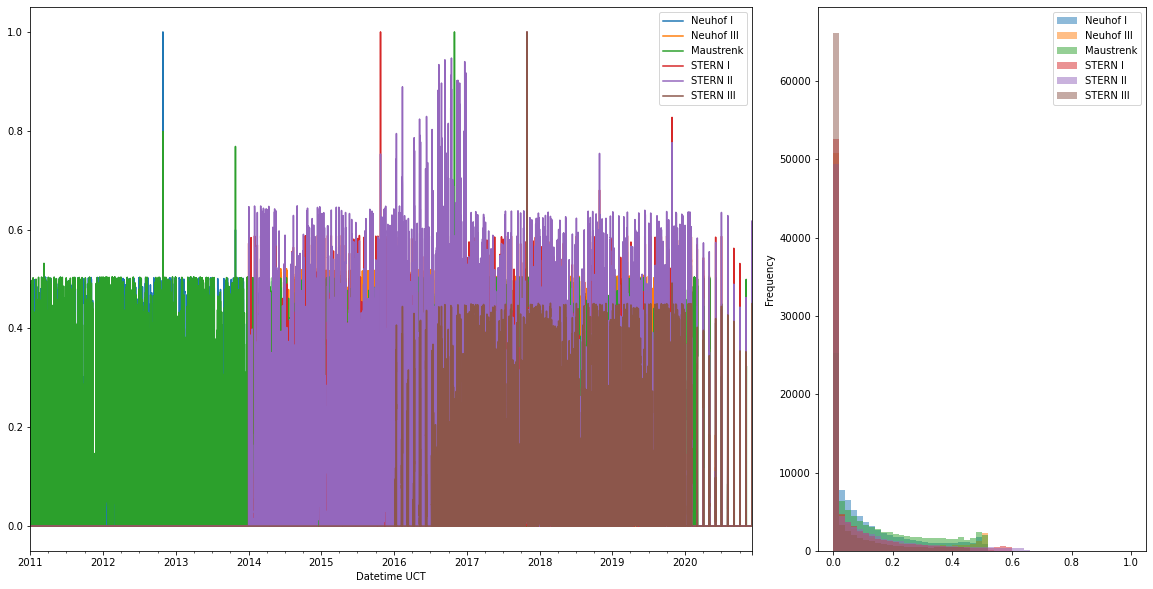

In [31]:
import FLUCCOplus.plots as fp
plt.figure(figsize=(20,10))
ax0 = plt.subplot2grid((1, 3), (0, 0), colspan=2)
ax1 = plt.subplot2grid((1, 3), (0, 2), colspan=1)
df_norm.plot(ax=ax0)
df_norm.plot.hist(ax=ax1, bins=50, alpha=0.5)

### remove outliers

In [18]:
df = df_norm.copy()
for col in df.columns:
    q = 0.999999
    print(col, q, df.loc[:,col].quantile(q), df[col].max())

Neuhof I 0.999999 0.9978457355311509 1.0
Neuhof III 0.999999 0.9584868080051369 1.0
Maustrenk 0.999999 0.9974469739446395 1.0
STERN I 0.999999 0.9992621929051588 1.0
STERN II 0.999999 0.9953992262639593 1.0
STERN III 0.999999 0.9573013053067956 1.0


In [19]:
df.describe()

,Neuhof I,Neuhof III,Maustrenk,STERN I,STERN II,STERN III
count,86976.000000,86976.000000,86976.000000,86976.000000,86976.000000,86976.000000
mean,0.118303,0.087083,0.152175,0.073870,0.087902,0.037635
std,0.141963,0.145273,0.159550,0.133677,0.148788,0.088864
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.004940,0.000000,0.011104,0.000000,0.000000,0.000000
50%,0.059172,0.001824,0.091249,0.000000,0.001377,0.000000
75%,0.179959,0.111171,0.262313,0.087033,0.116775,0.015426
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


remove_outliers_wow took 0:00:00.237410 for (124569, 6) df


<AxesSubplot:ylabel='Frequency'>

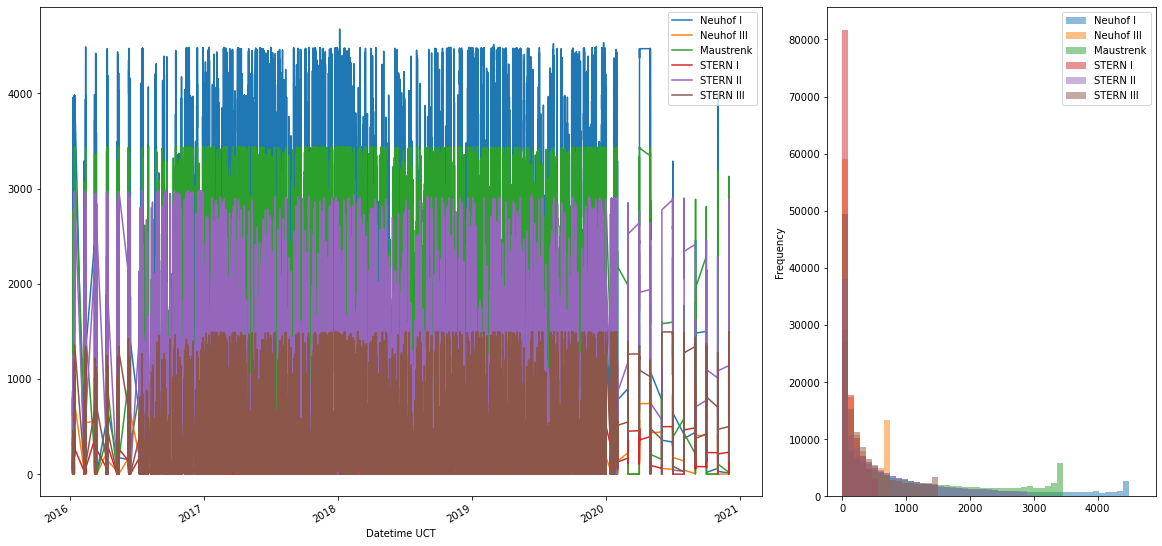

In [20]:
df_rm = web.remove_outliers_wow(df_web)
plt.figure(figsize=(20,10))
ax0 = plt.subplot2grid((1, 3), (0, 0), colspan=2)
ax1 = plt.subplot2grid((1, 3), (0, 2), colspan=1)
df_rm.plot(ax=ax0)
df_rm.plot.hist(ax=ax1, bins=50, alpha=0.5)

In [21]:
df_norm = df_rm.apply(lambda x: x/x.max())

<AxesSubplot:ylabel='Frequency'>

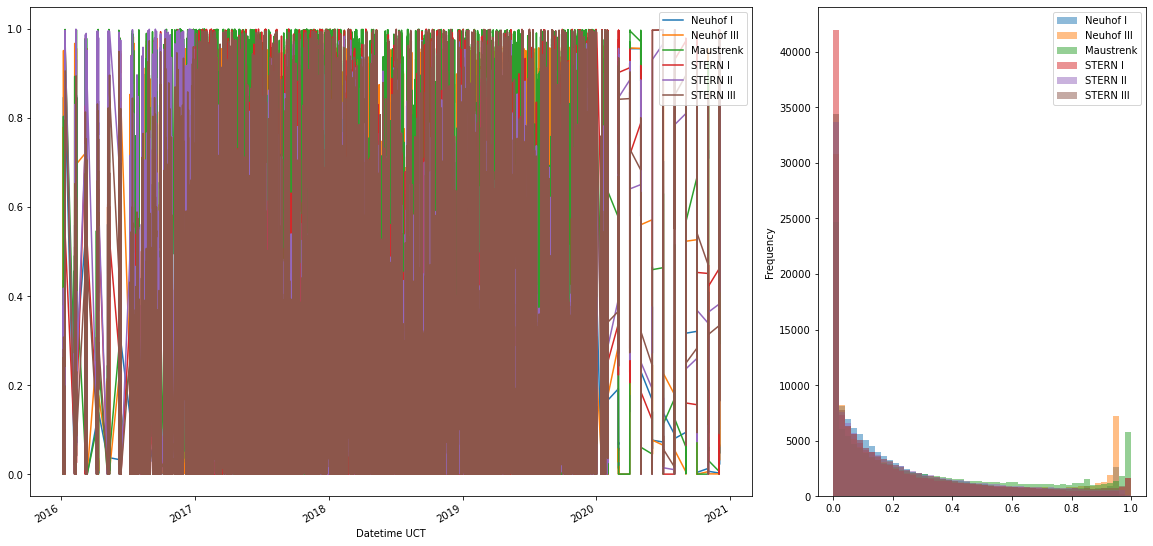

In [22]:
plt.figure(figsize=(20,10))
ax0 = plt.subplot2grid((1, 3), (0, 0), colspan=2)
ax1 = plt.subplot2grid((1, 3), (0, 2), colspan=1)
df_norm.plot(ax=ax0)
df_norm.plot.hist(ax=ax1, bins=50, alpha=0.5)

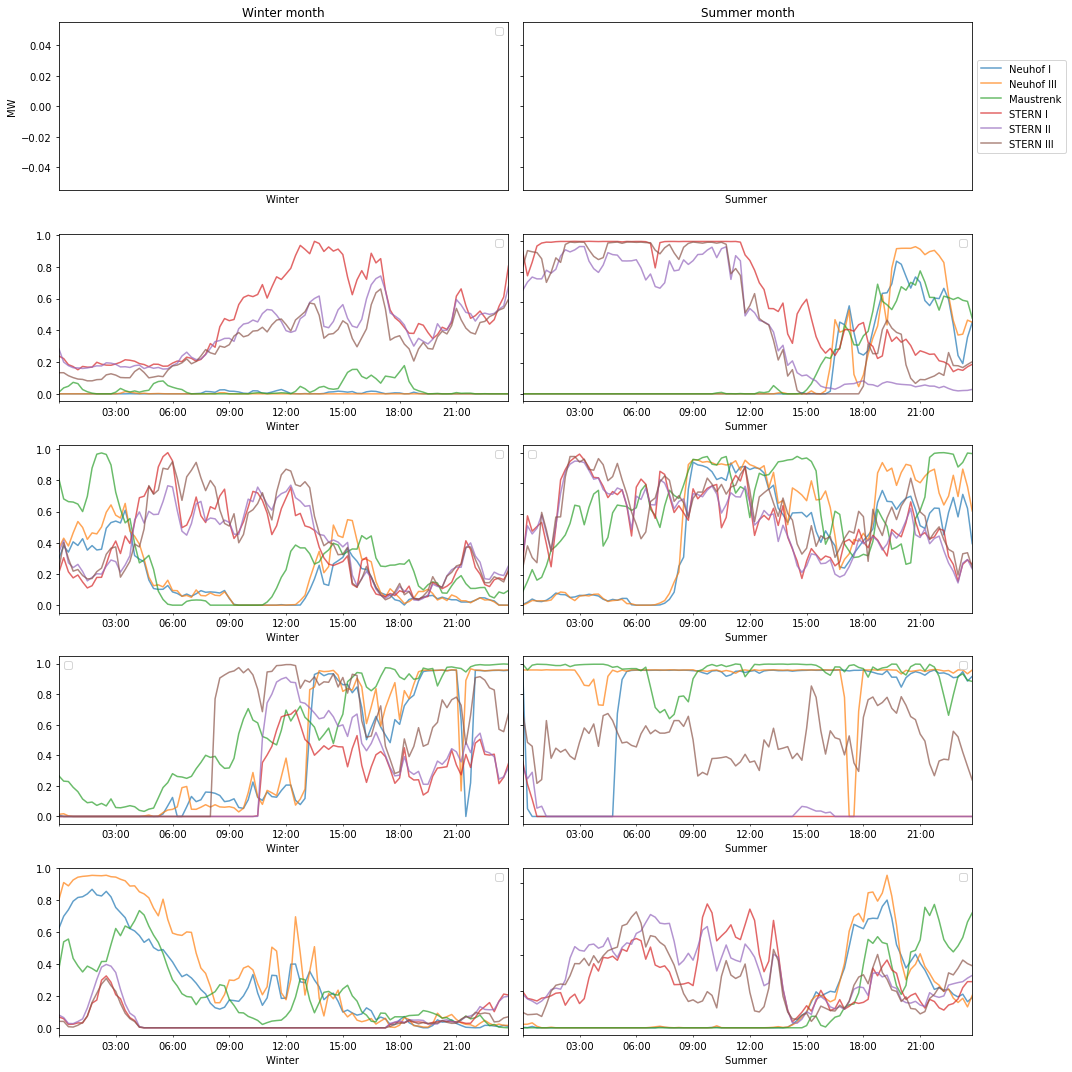

In [23]:
# need to convert to datetime index

years = [str(y) for y in df_norm.index.year.unique()]
fig, axes = plt.subplots(len(years), 2, figsize=(15, 15))
#df_yearly[anlagen].plot(kind="bar")
for i, y in enumerate(years):
    for windpark in df_norm.columns:

        df_norm.loc[y+"-1-1", [windpark]].plot(kind="line", alpha=0.7,xticks=[], sharey=True, ax=axes[i,0])
        df_norm.loc[y+"-2-1", [windpark]].plot(kind="line", alpha=0.7,xticks=[], sharey=True,ax=axes[i,1])

        axes[i,0].legend("");
        axes[i,1].legend("");
        axes[i,0].set(xlabel="Winter ")
        axes[i,1].set(xlabel="Summer ")

axes[0,-1].legend(loc='center left',bbox_to_anchor=(1.0, 0.5))
axes[0,1].set(title="Summer month", ylabel="")
axes[0,0].set(title="Winter month", ylabel="MW")
fig.tight_layout()

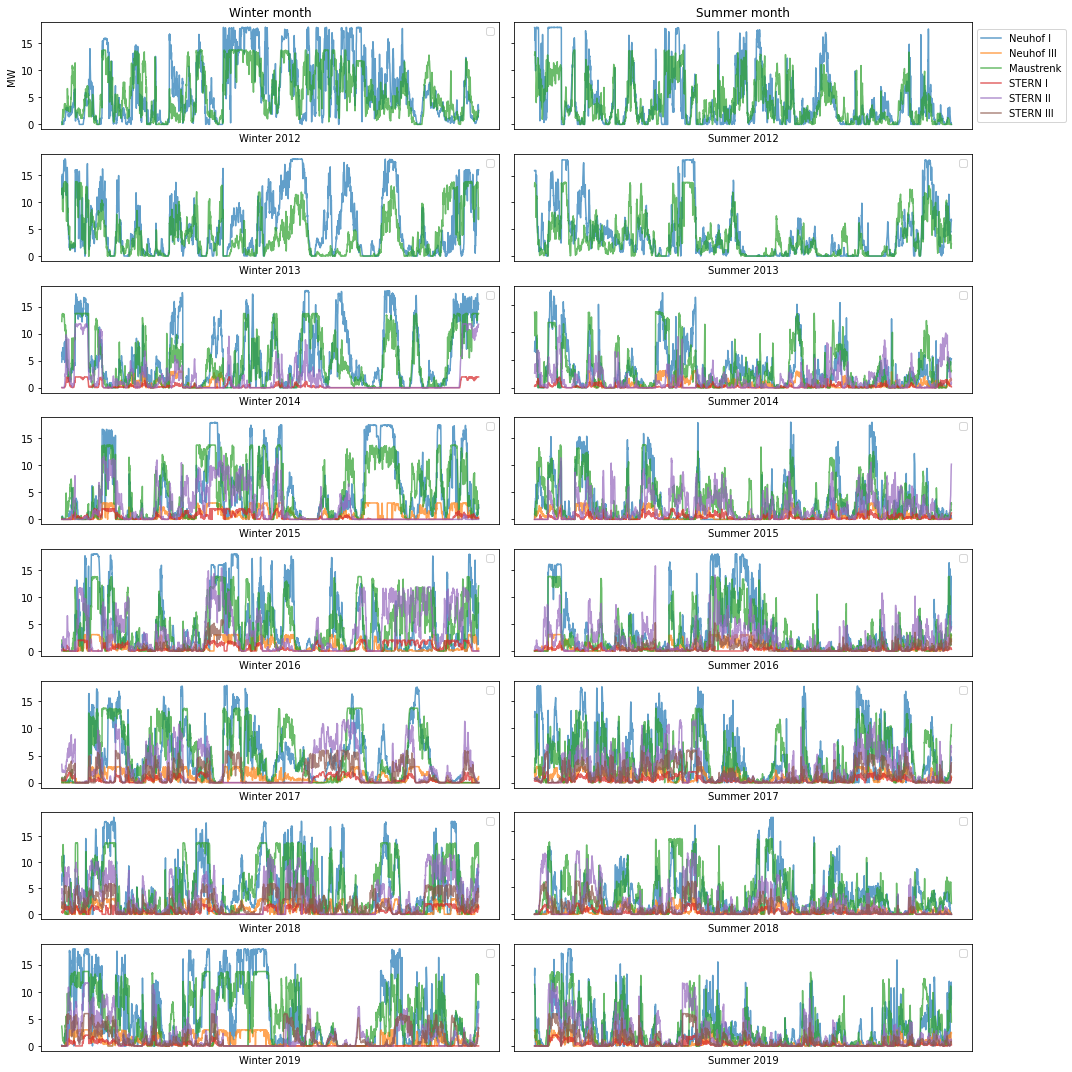

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns
years = ["2012","2013", "2014","2015","2016","2017","2018","2019"]
fig, axes = plt.subplots(len(years), 2, figsize=(15, 15))
#df_yearly[anlagen].plot(kind="bar")
for i, y in enumerate(years):
    for windpark in anlagen:

        df_power_MW.loc[y+"-1", [windpark]].plot(kind="line", alpha=0.7,xticks=[], sharey=True, ax=axes[i,0])

        df_power_MW.loc[y+"-7", [windpark]].plot(kind="line", alpha=0.7,xticks=[], sharey=True,ax=axes[i,1])
        axes[i,0].legend("");
        axes[i,1].legend("");
        axes[i,0].set(xlabel="Winter "+y)
        axes[i,1].set(xlabel="Summer "+y)

axes[0,-1].legend(loc='center left',bbox_to_anchor=(1.0, 0.5))
axes[0,1].set(title="Summer month", ylabel="")
axes[0,0].set(title="Winter month", ylabel="MW")
fig.tight_layout()

86976

### Jahresdauerlinien

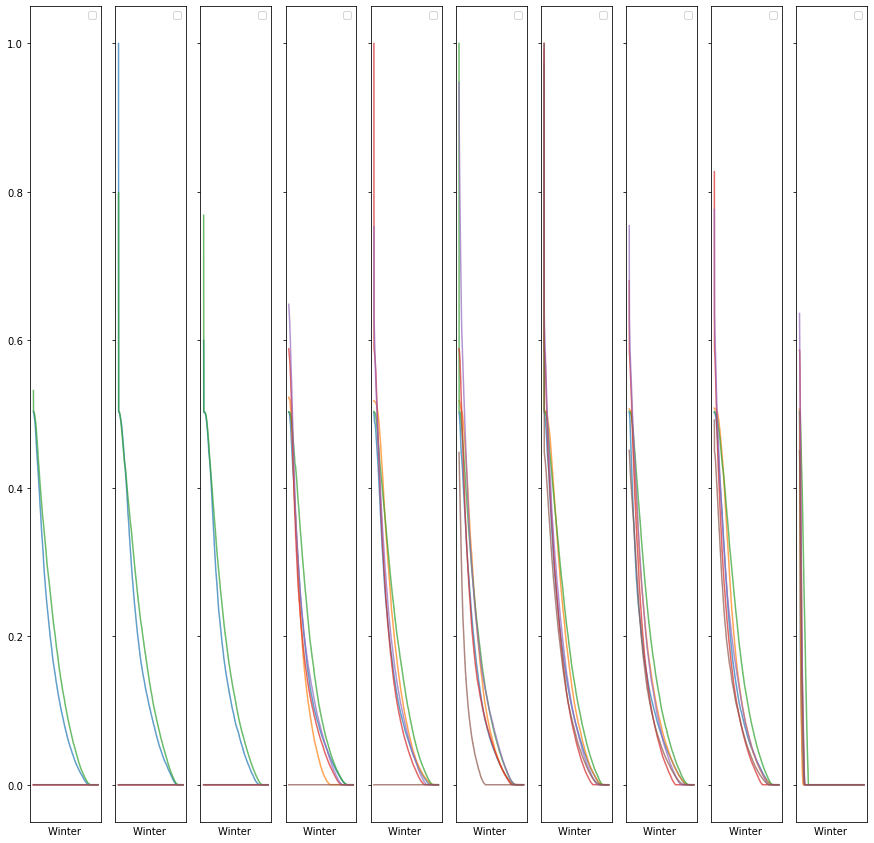

In [38]:
years = [str(y) for y in df_norm.index.year.unique()]
fig, axes = plt.subplots( 1,len(years), figsize=(15, 10),sharey=True)

for i, y in enumerate(years):
    for windpark in df_norm.columns:

        # df_norm.loc[y+"-1-1", [windpark]].plot(kind="line", alpha=0.7,xticks=[], sharey=True, ax=axes[i,0])
        df_norm.loc[y, [windpark]].sort_values(by=windpark,ascending=False)\
            .reset_index(drop=True)\
            .plot(kind="line", alpha=0.7,xticks=[], sharey=True,ax=axes[i])
        # df_power_MW.loc[y, [windpark]].sort_values(by=windpark,ascending=False)
        # .reset_index(drop=True).plot(ax=ax[i],xticks=[], sharey=True);
        axes[i].legend("")
        axes[i].legend("")
        axes[i].set(xlabel="Winter ")

# ax[-1].legend(loc='center left',bbox_to_anchor=(1.0, 0.5));

remove_outliers_wow took 0:00:00.431854 for 124569 rows, 6 columns in df
normalize took 0:00:00.022940 for 124569 rows, 6 columns in df


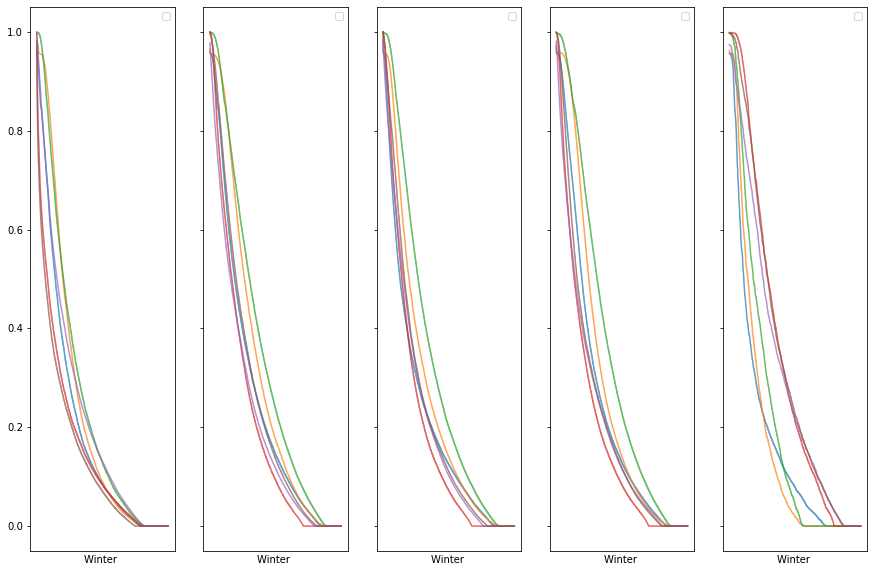

In [41]:
df =    (df_web
         .pipe(web.remove_outliers_wow)
         .pipe(web.normalize)
         )

def loadcurve(df):
    years = [str(y) for y in df.index.year.unique()]
    fig, axes = plt.subplots( 1,len(years), figsize=(15, 10),sharey=True)
    for i, y in enumerate(years):
        for windpark in df.columns:

            # df.loc[y+"-1-1", [windpark]].plot(kind="line", alpha=0.7,xticks=[], sharey=True, ax=axes[i,0])
            df.loc[y, [windpark]].sort_values(by=windpark,ascending=False)\
                .reset_index(drop=True)\
                .plot(kind="line", alpha=0.7,xticks=[], sharey=True,ax=axes[i])
            # df_power_MW.loc[y, [windpark]].sort_values(by=windpark,ascending=False)
            # .reset_index(drop=True).plot(ax=ax[i],xticks=[], sharey=True);
            axes[i].legend("")
            axes[i].legend("")
            axes[i].set(xlabel="Winter ")

loadcurve(df)

# ax[-1].legend(loc='center left',bbox_to_anchor=(1.0, 0.5));

In [ ]:

years = ["2012","2013", "2014","2015","2016","2017","2018","2019"]
fig, ax = plt.subplots(1,len(years), figsize=(15, 6))
for i, y in enumerate(years):
    for windpark in anlagen:
        df_power_MW.loc[y, [windpark]].sort_values(by=windpark,ascending=False).reset_index(drop=True).plot(ax=ax[i],xticks=[], sharey=True);
        ax[i].legend("");
        ax[i].set(ylabel="Power [MW]", xlabel=y);

ax[-1].legend(loc='center left',bbox_to_anchor=(1.0, 0.5));





# TODO: Try dask here!!
https://www.youtube.com/watch?v=4WUgRpl-j7Y&list=PLYx7XA2nY5GfdAFycPLBdUDOUtdQIVoMf&index=55&t=0s

<div class="alert alert-info alert-block">dasd</div>

also,
# Structural time seris
https://github.com/tensorflow/probability/blob/master/tensorflow_probability/examples/jupyter_notebooks/Structural_Time_Series_Modeling_Case_Studies_Atmospheric_CO2_and_Electricity_Demand.ipynb

https://www.youtube.com/watch?v=v5ijNXvlC5A&list=PLYx7XA2nY5GcDQblpQ_M1V3PQPoLWiDAC&index=41&t=0s

state space models
* filtering
* smoothing?
* predicting

https://en.wikipedia.org/wiki/Kalman_filter

time series feature generation:
* max
* Number peaks

und hier gehts weiter
https://www.youtube.com/watch?v=IWv6EZGa4zo&list=PLYx7XA2nY5GcDQblpQ_M1V3PQPoLWiDAC&index=95&t=0s

# BOSS
Bag of Fast Fourier Symbols
[Source](https://pyts.readthedocs.io/en/latest/auto_examples/transformation/plot_boss.html#sphx-glr-auto-examples-transformation-plot-boss-py)


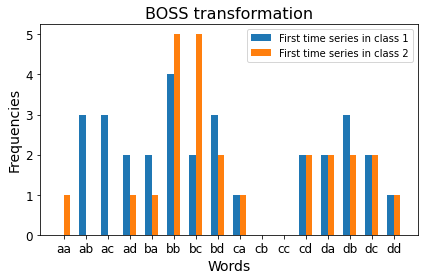

In [26]:
from pyts.datasets import load_gunpoint
from pyts.transformation import BOSS

# Toy dataset
X_train, _, y_train, _ = load_gunpoint(return_X_y=True)

# BOSS transformation
boss = BOSS(word_size=2, n_bins=4, window_size=12, sparse=False)
X_boss = boss.fit_transform(X_train)

# Visualize the transformation for the first time series
plt.figure(figsize=(6, 4))
vocabulary_length = len(boss.vocabulary_)
width = 0.3
plt.bar(np.arange(vocabulary_length) - width / 2, X_boss[y_train == 1][0],
        width=width, label='First time series in class 1')
plt.bar(np.arange(vocabulary_length) + width / 2, X_boss[y_train == 2][0],
        width=width, label='First time series in class 2')
plt.xticks(np.arange(vocabulary_length),
           np.vectorize(boss.vocabulary_.get)(np.arange(X_boss[0].size)),
           fontsize=12)
y_max = np.max(np.concatenate([X_boss[y_train == 1][0],
                               X_boss[y_train == 2][0]]))
plt.yticks(np.arange(y_max + 1), fontsize=12)
plt.xlabel("Words", fontsize=14)
plt.ylabel("Frequencies", fontsize=14)
plt.title("BOSS transformation", fontsize=16)
plt.legend(loc='best', fontsize=10)
plt.tight_layout()
plt.show()







